# General Analysis of the Newer results of the ICFES

In [1]:
import pandas as pd
import numpy as np
from time import time
import matplotlib.pyplot as plt
%matplotlib inline
%run -i ../../tools/label_encoder.py
%run -i ../../tools/predict_functions.py

## ESTATISTICAL TO USE

The same of the previous analysis.

-MAE: MEAN ABSOLUTE ERROR

In [2]:
data_2014_2 = pd.read_csv('../../DatosFTPICFES/SABER11/SB11-BASES_DE_DATOS/READY/2014_2.csv', sep=';')

In [3]:
data_2014_2.shape

(570750, 65)

In [4]:
for i in data_2014_2.columns:
    print(i)

ESTU_ESTUDIANTE
ESTU_EDAD
ESTU_PAIS_RESIDE
ESTU_GENERO
ESTU_ETNIA
ESTU_ZONA_RESIDE
COLE_COD_ICFES
COLE_JORNADA
COLE_GENERO
COLE_CARACTER
COLE_NATURALEZA
COLE_BILINGUE
COLE_CALENDARIO
COLE_AREA_UBICACION
ESTU_COD_RESIDE_DEPTO
ESTU_PRESENTO_ANTECEDENTES
ESTU_TIPO_CARRERA_DESEADA
ESTU_IES_COD_DESEADA
ESTU_IES_MPIO_DESEADA
ESTU_COD_OTRO_PAIS_PLANTEL
ESTU_VECES_ESTADO_ESTUDIANTIL
ESTU_PRESENTO_EXPECTATIVAS
ESTU_PRIVADO_LIBERTAD
FAMI_EDUCA_PADRE
FAMI_OCUPA_PADRE
FAMI_OCUPA_MADRE
FAMI_NIVEL_SISBEN
FAMI_PERSONAS_HOGAR
FAMI_CUARTOS_HOGAR
FAMI_PISOSHOGAR
FAMI_TELEFONO_FIJO
FAMI_INTERNET
FAMI_SERVICIO_TELEVISION
FAMI_DVD
FAMI_LAVADORA
FAMI_MICROONDAS
FAMI_AUTOMOVIL
FAMI_CELULAR
FAMI_NEVERA
FAMI_HORNO
FAMI_INGRESO_FMILIAR_MENSUAL
ESTU_TRABAJA
ESTU_VECES_ESTADO
ESTU_COD_PLANTEL
ESTU_MCPIO_PRESENTACION
ESTU_DEPTO_PRESENTACION
DECIL_LECTURA_CRITICA
PUNT_LECTURA_CRITICA
DECIL_MATEMATICAS
PUNT_MATEMATICAS
DECIL_C_NATURALES
PUNT_C_NATURALES
DECIL_SOCIALES_CIUDADANAS
PUNT_SOCIALES_CIUDADANAS
DECIL_INGLES

Selected variables to be predicted in this Project OR IN ANOTHER FUTURE PROJECT:  

    -DECIL_LECTURA_CRITICA
    -PUNT_LECTURA_CRITICA
    -DECIL_MATEMATICAS
    -PUNT_MATEMATICAS
    -DECIL_C_NATURALES
    -PUNT_C_NATURALES
    -DECIL_SOCIALES_CIUDADANAS
    -PUNT_SOCIALES_CIUDADANAS
    -DECIL_INGLES
    -DESEMP_INGLES
    -PUNT_INGLES
    -DECIL_RAZONA_CUANT
    -PUNT_RAZONA_CUANT
    -DECIL_COMP_CIUDADANA
    -PUNT_COMP_CIUDADANA
    -PUNT_GLOBAL
    -ESTU_PUESTO


In [5]:
y_list=['DECIL_LECTURA_CRITICA', 'PUNT_LECTURA_CRITICA', 'DECIL_MATEMATICAS', 'PUNT_MATEMATICAS', 'DECIL_C_NATURALES',
        'PUNT_C_NATURALES', 'DECIL_SOCIALES_CIUDADANAS', 'PUNT_SOCIALES_CIUDADANAS', 'DECIL_INGLES', 'DESEMP_INGLES',
        'PUNT_INGLES', 'DECIL_RAZONA_CUANT', 'PUNT_RAZONA_CUANT', 'DECIL_COMP_CIUDADANA', 'PUNT_COMP_CIUDADANA', 
        'PUNT_GLOBAL', 'ESTU_PUESTO']
X_list = data_2014_2.columns.difference(y_list)

In [6]:
X = data_2014_2.filter(items=X_list)
Y = data_2014_2.filter(items=y_list)

## Treatment of the Muticollinearity

-all data

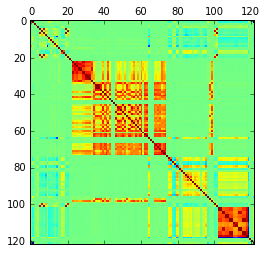

In [192]:
plt.matshow(data_2014_2.corr())

Just the X data

In [7]:
X_CORR = X.corr()

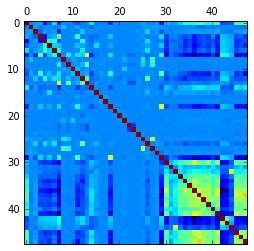

In [8]:
plt.matshow(X_CORR)

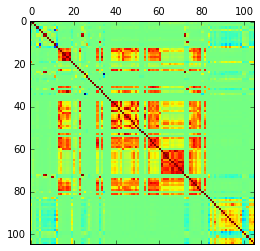

In [194]:
plt.matshow(X_CORR)

Here we can see a lot of columns that are strongly related.  
Now i have to decide what to do with that columns.
That Columns will be deleted.

In [184]:
X_CORR.iloc[23:28, 15:20]

,ESTU_GENERO,ESTU_IES_COD_DESEADA,ESTU_IES_MPIO_DESEADA,ESTU_MCPIO_PRESENTACION,ESTU_NACIMIENTO_ANNO
ESTU_PRESENTO_ANTECEDENTES,-0.001208,-0.004321,0.001257,0.001737,0.017915
ESTU_PRESENTO_EXPECTATIVAS,-0.001599,-0.000627,-0.001394,0.001854,0.016211
ESTU_PRIVADO_LIBERTAD,0.013058,0.000138,-0.000372,-0.005128,-0.009015
ESTU_RESIDE_MCPIO,-0.005890,0.003067,0.000850,0.846251,-0.016446
ESTU_TIPO_CARRERA_DESEADA,-0.001859,-0.000877,-0.005416,-0.004936,0.013687


Columns to delete:  
- ESTU_ANO_MATRICULA_PRIMERO

In [206]:
X = X.drop(['ESTU_ANO_MATRICULA_PRIMERO', 'ESTU_ANO_MATRICULA_SEXTO', 'ESTU_ANO_TERMINO_QUINTO', 'ESTU_ANOS_PREESCOLAR',
           'ESTU_ANO_TERMINO_BACHILL', 'ESTU_ANOS_COLEGIO_ACTUAL', 'ESTU_CUANTOS_COLE_ESTUDIO', 'ESTU_INGRESO_CARRERA',
           'ESTU_MES_TERMINO_BACHILL', 'ESTU_POR_AMIGOSESTUDIANDO', 'ESTU_POR_BUSCANDOCARRERA', 'ESTU_POR_COLOMBIAAPRENDE',
           'ESTU_POR_COSTOMATRICULA', 'ESTU_POR_INFLUENCIAALGUIEN', 'ESTU_POR_MEJORARPOSICIONSOCIAL', 
           'ESTU_POR_ORIENTACIONVOCACIONAL', 'ESTU_POR_UNICAQUEOFRECE', 'ESTU_POR_UBICACION', 'ESTU_PRESTIGIOINSTITUCION',
           'ESTU_POR_TRADICIONFAMILIAR', 'ESTU_POR_OPORTUNIDADES', 'ESTU_PROGRAMA_ACADEMICODESEADO', 
           'ESTU_PUNT_ESPERADO_LENGUAJE', 'ESTU_PUNT_ESPERADO_INGLES', 'ESTU_PUNT_ESPERADO_MATEMATICAS', 'ESTU_RECIBE_SALARIO',
           'ESTU_REPROBO_CUARTO', 'ESTU_REPROBO_DECIMO', 'ESTU_POR_OTRARAZON', 'ESTU_POR_INTERESPERSONAL',
           'ESTU_RAZON_RETIRO', 'ESTU_REPROBO_NOVENO', 'ESTU_REPROBO_OCTAVO', 'ESTU_REPROBO_ONCE_MAS', 
           'ESTU_REPROBO_PRIMERO', 'ESTU_REPROBO_QUINTO', 'ESTU_REPROBO_SEGUNDO', 'ESTU_REPROBO_SEPTIMO',
           'ESTU_REPROBO_SEXTO', 'ESTU_REPROBO_SEGUNDO', 'ESTU_REPROBO_TERCERO', 'ESTU_RETIRARSE_COLEGIO', 
           'ESTU_SALARIO_ESPERADO_BACH', 'ESTU_SALARIO_ESPERADO_PROFES', 'ESTU_SALARIO_ESPERADO_TECNICO', 
           'ESTU_TOTAL_ALUMNOS_CURSO', 'FAMI_COMPUTADOR', 'FAMI_ESTRATO_VIVIENDA', 'FAMI_EDUCA_MADRE', 
           'COLE_VALOR_PENSION', 'COLE_COD_DANE_INSTITUCION', 'ESTU_AREA_RESIDE', 'COLE_COD_MCPIO_UBICACION',
           'COLE_MCPIO_UBICACION', 'ESTU_RESIDE_DEPTO', 'ESTU_NACIMIENTO_ANNO', 'ESTU_RESIDE_MCPIO', 
           'COLE_DEPTO_UBICACION'], axis=1)
data_2014_2 = data_2014_2.drop(['ESTU_ANO_MATRICULA_PRIMERO', 'ESTU_ANO_MATRICULA_SEXTO', 'ESTU_ANO_TERMINO_QUINTO', 'ESTU_ANOS_PREESCOLAR',
           'ESTU_ANO_TERMINO_BACHILL', 'ESTU_ANOS_COLEGIO_ACTUAL', 'ESTU_CUANTOS_COLE_ESTUDIO', 'ESTU_INGRESO_CARRERA',
           'ESTU_MES_TERMINO_BACHILL', 'ESTU_POR_AMIGOSESTUDIANDO', 'ESTU_POR_BUSCANDOCARRERA', 'ESTU_POR_COLOMBIAAPRENDE',
           'ESTU_POR_COSTOMATRICULA', 'ESTU_POR_INFLUENCIAALGUIEN', 'ESTU_POR_MEJORARPOSICIONSOCIAL', 
           'ESTU_POR_ORIENTACIONVOCACIONAL', 'ESTU_POR_UNICAQUEOFRECE', 'ESTU_POR_UBICACION', 'ESTU_PRESTIGIOINSTITUCION',
           'ESTU_POR_TRADICIONFAMILIAR', 'ESTU_POR_OPORTUNIDADES', 'ESTU_PROGRAMA_ACADEMICODESEADO', 
           'ESTU_PUNT_ESPERADO_LENGUAJE', 'ESTU_PUNT_ESPERADO_INGLES', 'ESTU_PUNT_ESPERADO_MATEMATICAS', 'ESTU_RECIBE_SALARIO',
           'ESTU_REPROBO_CUARTO', 'ESTU_REPROBO_DECIMO', 'ESTU_POR_OTRARAZON', 'ESTU_POR_INTERESPERSONAL',
           'ESTU_RAZON_RETIRO', 'ESTU_REPROBO_NOVENO', 'ESTU_REPROBO_OCTAVO', 'ESTU_REPROBO_ONCE_MAS', 
           'ESTU_REPROBO_PRIMERO', 'ESTU_REPROBO_QUINTO', 'ESTU_REPROBO_SEGUNDO', 'ESTU_REPROBO_SEPTIMO',
           'ESTU_REPROBO_SEXTO', 'ESTU_REPROBO_SEGUNDO', 'ESTU_REPROBO_TERCERO', 'ESTU_RETIRARSE_COLEGIO', 
           'ESTU_SALARIO_ESPERADO_BACH', 'ESTU_SALARIO_ESPERADO_PROFES', 'ESTU_SALARIO_ESPERADO_TECNICO', 
           'ESTU_TOTAL_ALUMNOS_CURSO', 'FAMI_COMPUTADOR', 'FAMI_ESTRATO_VIVIENDA', 'FAMI_EDUCA_MADRE', 
           'COLE_VALOR_PENSION', 'COLE_COD_DANE_INSTITUCION', 'ESTU_AREA_RESIDE', 'COLE_COD_MCPIO_UBICACION',
           'COLE_MCPIO_UBICACION', 'ESTU_COD_RESIDE_DEPTO', 'ESTU_NACIMIENTO_ANNO', 'ESTU_RESIDE_MCPIO', 
           'COLE_DEPTO_UBICACION'], axis=1)

In [199]:
X = X.drop('COLE_DEPTO_UBICACION', axis=1)

In [200]:
X_CORR = X.corr()

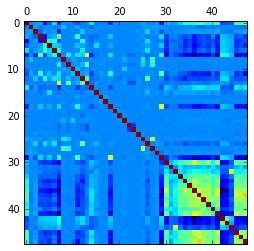

In [201]:
plt.matshow(X_CORR)

In [207]:
data_2014_2.to_csv('../../DatosFTPICFES/SABER11/SB11-BASES_DE_DATOS/READY/2014_2.csv', sep=';', index=False)

___

## PLOT OF THE TARGETS

In [209]:
data_2014_2 = pd.read_csv('../../DatosFTPICFES/SABER11/SB11-BASES_DE_DATOS/READY/2014_2.csv', sep=';')

In [212]:
y_list=['DECIL_LECTURA_CRITICA', 'PUNT_LECTURA_CRITICA', 'DECIL_MATEMATICAS', 'PUNT_MATEMATICAS', 'DECIL_C_NATURALES',
        'PUNT_C_NATURALES', 'DECIL_SOCIALES_CIUDADANAS', 'PUNT_SOCIALES_CIUDADANAS', 'DECIL_INGLES', 'DESEMP_INGLES',
        'PUNT_INGLES', 'DECIL_RAZONA_CUANT', 'PUNT_RAZONA_CUANT', 'DECIL_COMP_CIUDADANA', 'PUNT_COMP_CIUDADANA', 
        'PUNT_GLOBAL', 'ESTU_PUESTO']
new_y_list = ['PUNT_LECTURA_CRITICA', 'PUNT_MATEMATICAS', 'PUNT_C_NATURALES', 'PUNT_SOCIALES_CIUDADANAS', 'PUNT_INGLES',
             'PUNT_RAZONA_CUANT', 'PUNT_COMP_CIUDADANA', 'PUNT_GLOBAL']
X_list = data_2014_2.columns.difference(y_list)

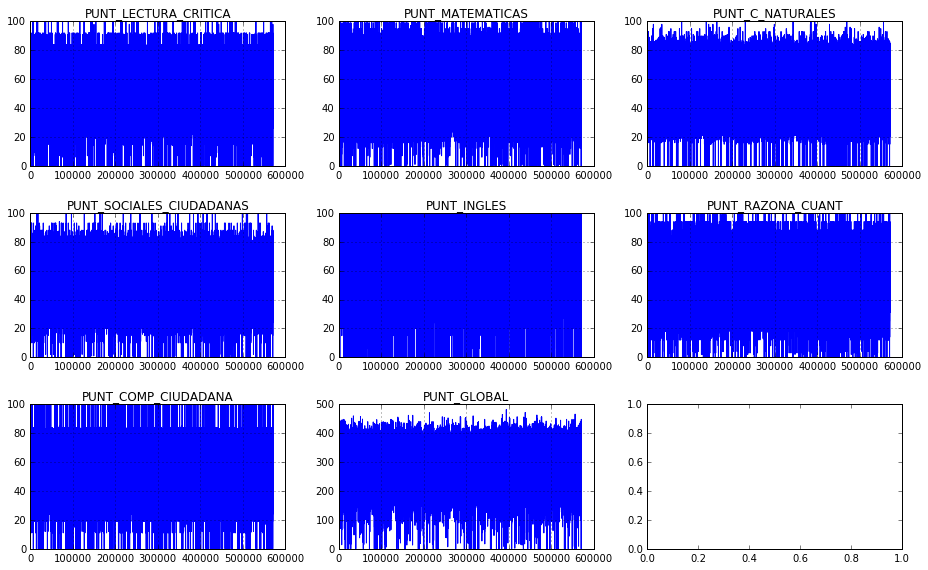

In [216]:
fig, axes = plt.subplots(3, 3, sharex=False, figsize=(13, 8))
axs = [i for i in axes.flatten()]
New_X = data_2014_2.filter(items = X_list)
New_Y = data_2014_2.filter(items = new_y_list)
for n, i in enumerate(new_y_list):
    ax = axs[n]
    ax.plot(range(New_Y.shape[0]), New_Y[i])
    ax.set_title(i)
    ax.grid()
plt.tight_layout(h_pad=2)

Ordered

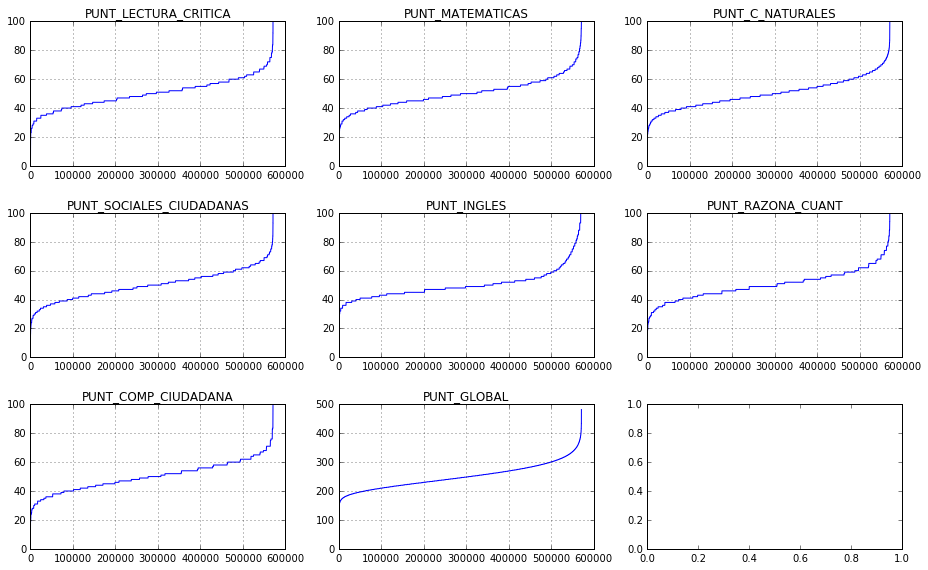

In [217]:
fig, axes = plt.subplots(3, 3, sharex=False, figsize=(13, 8))
axs = [i for i in axes.flatten()]
for n, i in enumerate(new_y_list):
    D_sorted = data_2014_2.sort_values(by=i)
    New_X = D_sorted.filter(items = X_list)
    New_Y = D_sorted.filter(items = new_y_list)
    ax = axs[n]
    ax.plot(range(New_Y.shape[0]), New_Y[i])
    ax.set_title(i)
    ax.grid()
plt.tight_layout(h_pad=2)